In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Pueden importar las librerías de gráficos que quieran.
pd.options.display.float_format = '{:,.2f}'.format

## Archivos proporcionados

En el primer archivo "operaciones.csv" están las operaciones realizadas por los clientes (identificados por la columna CODCLAVECIC), la cantidad de dólares cambiados y el precio al que se cambiaron. **Además contiene la fecha y hora en la que se realizó cada operación.**

El segundo archivo "segmentos.xlsx" contiene la información de a qué SEGMENTO pertenece cada cliente de la tabla "operaciones.csv".

El tercer archivo "vinculacion.parquet" contiene un indicador del nivel de vinculacion del cliente con el BCP que se actualiza todos los meses.

## Ejercicio 1

#### Parte 1:

a) Lea los archivos proporcionados.

b) Calcule (i) la cantidad total y (ii) el ingreso promedio para cada segmento de clientes (Hint: el ingreso se calcula como PxQ).

Los clientes de la tabla "operaciones.csv" que NO aparecen en la tabla de "segmentos.xlsx" son "NO SEGMENTADOS".
 

In [2]:
operaciones = pd.read_csv("operaciones.csv", sep= ',')
segmentos = pd.read_excel("segmentos.xlsx")
vinculacion = pd.read_parquet("vinculacion.parquet")

In [3]:
operaciones.head(6)

,CODCLAVECIC,FECHA,HORA,CANTIDAD,PRECIO
0,14500,01/03/22,08:51:03,"2,000,000.00",20.00
1,2705162,01/03/22,09:01:44,"100,000.00",60.00
2,47638,01/03/22,09:02:58,"120,000.00",250.00
3,1570837,01/03/22,09:03:28,"5,000.00",220.00
4,83580,01/03/22,09:06:16,"5,000.00",300.00
5,11171322,01/03/22,09:06:30,"5,000.00",260.00


In [4]:
segmentos.head(6)

,CODCLAVECIC,SEGMENTO
0,24640513,PYME
1,9164066,NEGOCIOS
2,137683,PYME
3,7907034,PYME
4,7651274,PYME
5,7037943,PYME


In [5]:
operaciones.shape

(81128, 5)

In [6]:
segmentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36850 entries, 0 to 36849
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CODCLAVECIC  36850 non-null  int64 
 1   SEGMENTO     36850 non-null  object
dtypes: int64(1), object(1)
memory usage: 575.9+ KB


In [7]:
unidos = pd.merge(operaciones, segmentos, how = "left", on= ["CODCLAVECIC"])
unidos

,CODCLAVECIC,FECHA,HORA,CANTIDAD,PRECIO,SEGMENTO
0,14500,01/03/22,08:51:03,"2,000,000.00",20.00,CORPORATIVA
1,2705162,01/03/22,09:01:44,"100,000.00",60.00,SENIOR
2,47638,01/03/22,09:02:58,"120,000.00",250.00,NEGOCIOS
3,1570837,01/03/22,09:03:28,"5,000.00",220.00,JUNIOR
4,83580,01/03/22,09:06:16,"5,000.00",300.00,NEGOCIOS
...,...,...,...,...,...,...
81123,2679372,30/06/22,17:51:50,"300,000.00",30.00,INSTITUCIONAL
81124,19865961,30/06/22,17:54:46,"15,000.00",100.00,PYME
81125,60648,30/06/22,17:56:41,"5,000.00",700.00,PYME
81126,24983287,30/06/22,17:57:05,"15,000.00",50.00,PYME


In [8]:
unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81128 entries, 0 to 81127
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODCLAVECIC  81128 non-null  int64  
 1   FECHA        81128 non-null  object 
 2   HORA         81128 non-null  object 
 3   CANTIDAD     81128 non-null  float64
 4   PRECIO       81128 non-null  float64
 5   SEGMENTO     72923 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [9]:
unidos["SEGMENTO"] = unidos["SEGMENTO"].fillna("NO_SEGMENTADOS")
unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81128 entries, 0 to 81127
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODCLAVECIC  81128 non-null  int64  
 1   FECHA        81128 non-null  object 
 2   HORA         81128 non-null  object 
 3   CANTIDAD     81128 non-null  float64
 4   PRECIO       81128 non-null  float64
 5   SEGMENTO     81128 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [10]:
# Hallar la cantidad total
cantidad_total= unidos.groupby("SEGMENTO")["CANTIDAD"].sum().reset_index()
cantidad_total

,SEGMENTO,CANTIDAD
0,CORPORATIVA,"1,936,965,338.71"
1,INSTITUCIONAL,"194,675,814.16"
2,JUNIOR,"1,226,068,516.29"
3,MULTINACIONAL,"678,133,346.33"
4,NEGOCIOS,"1,233,981,637.72"
5,NO_SEGMENTADOS,"870,214,418.64"
6,PYME,"540,128,424.53"
7,SENIOR,"854,363,280.46"


In [11]:
# Hallar el ingreso promedio (PXQ)
unidos["INGRESO_PROMEDIO"]= unidos["CANTIDAD"]*unidos["PRECIO"]
ingreso_promedio = unidos.groupby("SEGMENTO")["INGRESO_PROMEDIO"].mean().reset_index()
ingreso_promedio

,SEGMENTO,INGRESO_PROMEDIO
0,CORPORATIVA,"55,277,837.73"
1,INSTITUCIONAL,"14,515,978.35"
2,JUNIOR,"8,106,515.38"
3,MULTINACIONAL,"33,948,638.44"
4,NEGOCIOS,"9,794,992.33"
5,NO_SEGMENTADOS,"18,328,490.58"
6,PYME,"7,627,090.54"
7,SENIOR,"14,136,086.91"


#### Parte 2:

c) Calcule la cantidad total MENSUAL para clientes con "SoW" mayor a 60%

Considere que el "SoW" mostrado en la tabla "vinculacion.parquet" se actualiza cada mes para cada cliente.

d) Realice un gráfico sencillo que muestre sus resultados. (En caso utilice librerías, puede utilizar la de su preferencia).

In [12]:
vinculacion.head(6)

,codclavecic,codmes,SoW
0,7770924,202212,0.00
2,24800643,202212,0.08
5,21508521,202212,0.00
6,19335572,202212,1.00
7,32595,202212,0.00
8,7520199,202212,0.00


In [13]:
filtrados=vinculacion[vinculacion["SoW"]>0.6]
filtrados=filtrados.rename(columns={"codclavecic":"CODCLAVECIC"}).astype(int)
filtrados.head(5)

,CODCLAVECIC,codmes,SoW
6,19335572,202212,1
19,3589531,202212,0
21,4140804,202212,1
23,21476461,202212,1
30,3579927,202212,1


In [14]:
cantidad_mensual=pd.merge(filtrados,operaciones,how="inner",on=["CODCLAVECIC"])
cantidad_mensual=cantidad_mensual.groupby("codmes")["CANTIDAD"].sum().reset_index()
cantidad_mensual.head(2)

,codmes,CANTIDAD
0,202201,"3,198,651,843.79"
1,202202,"3,094,982,547.13"


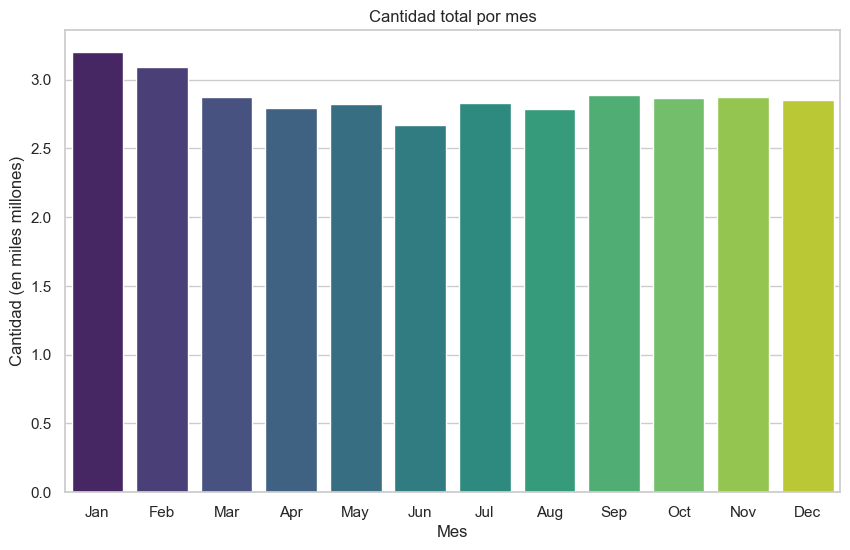

In [15]:
cantidad_mensual["codmes"] = pd.to_datetime(cantidad_mensual["codmes"].astype(str), format="%Y%m")
cantidad_mensual["CANTIDAD"]= cantidad_mensual["CANTIDAD"]/1_000_000_000
# Escogiendo tema 
sns.set_theme(style ="whitegrid")
# Grafico de barras
plt.figure(figsize=(10,6))
sns.barplot(y="CANTIDAD", x="codmes", hue ="codmes", data=cantidad_mensual,palette="viridis")
# Configurar el eje x 
plt.xticks(range(len(cantidad_mensual["codmes"])), cantidad_mensual["codmes"].dt.strftime("%b"))
#Configuracion de titulos
plt.title("Cantidad total por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad (en miles millones)")
plt.show()

## Ejercicio 2

#### Parte 1:

a) Cree una función que calcule el VAN, a partir de un vector de "flujos de caja" y una tasa de descuento. Su función debe funcionar para vectores de diferentes dimensiones.

La fórmula de VAN está dada por:

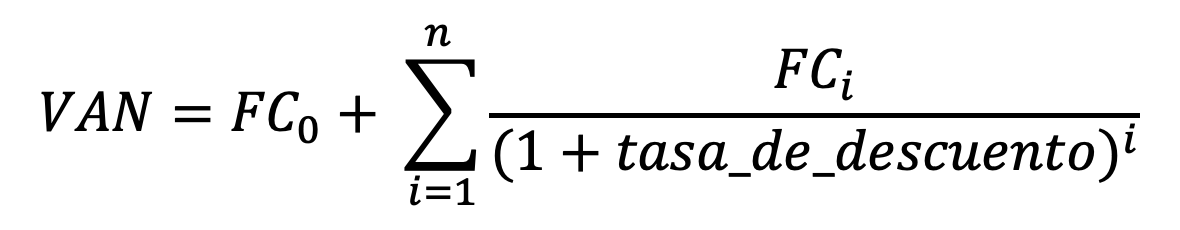

In [16]:
#Proyecto de ejemplo:
vector_de_flujos = [-1900, 255, 227, 250, 158, 298, 199, 150, 169, 278, 188]
tasa_de_descuento = 0.0146
segmento = "CONSUMO"

In [17]:
def calcular_VAN(flujos, tasa_descuento):
    VAN = round(sum([flujo/(1 + tasa_descuento)**indice for indice, flujo in enumerate(flujos)]),2)
    return VAN

print(f"El valor del VAN es {calcular_VAN(vector_de_flujos,tasa_de_descuento)} para el segmento {segmento}")

El valor del VAN es 112.56 para el segmento CONSUMO


#### Parte 2:

b) Cree una función que señale si debemos aprobar un crédito, a partir de un vector de "flujos de caja" y el segmento del cliente. (Hint: utilice sus conocimientos financieros para definir el criterio a partir del valor del VAN).

Considere que los segmentos "BEX" y "ENALTA" tienen una tasa de descuento de 0.0122; y el segmento "CONSUMO" de 0.0146

In [18]:
def aprobar_credito(flujos,segmento):
    if segmento == "BEX" or "ENALTA":
        tasa_descuento = 0.0122
    else:
        tasa_descuento = 0.0146 
    VAN= round(sum([flujo/(1+ tasa_descuento)**indice for indice, flujo in enumerate(flujos)]),2)
    if VAN >0:
        return "aprobado"
    else:
        return "desaprobado"
print(f"El credito debe ser {aprobar_credito(vector_de_flujos,segmento)}")

El credito debe ser aprobado


#### Parte 3:

c) Cree un vector de tasas entre 0% (0.0000) y 5% (0.0500) con incrementos de 10 puntos básicos entre ellas (Hint: 1 punto básico es igual a 0.0001).

d) A partir de la función de la pregunta (a) y el vector de la pregunta (c); cree un gráfico que muestre la relación entre la tasa de descuento y el VAN. Use el proyecto de ejemplo en su respuesta. (En caso utilice librerías, puede utilizar la de su preferencia).

In [19]:
# Creando el vector de tasas y sus componentes 
tasas = []
tasa_inicial = 0.0
tasa_final = 0.051
incremento = 0.0001*10 # incrementar cada 10 puntos básicos (1 punto básico es 0.0001)

# Rellenando el vector 
def crear_vector(tasa_inicial, tasa_final, incremento):
    tasa_actual = tasa_inicial
    while tasa_actual <= tasa_final:
        tasas.append(round(tasa_actual,3))
        tasa_actual += incremento
    return tasas 
TASAS = crear_vector(tasa_inicial, tasa_final, incremento)
TASAS

[0.0,
 0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.011,
 0.012,
 0.013,
 0.014,
 0.015,
 0.016,
 0.017,
 0.018,
 0.019,
 0.02,
 0.021,
 0.022,
 0.023,
 0.024,
 0.025,
 0.026,
 0.027,
 0.028,
 0.029,
 0.03,
 0.031,
 0.032,
 0.033,
 0.034,
 0.035,
 0.036,
 0.037,
 0.038,
 0.039,
 0.04,
 0.041,
 0.042,
 0.043,
 0.044,
 0.045,
 0.046,
 0.047,
 0.048,
 0.049,
 0.05]

In [21]:
# Calculando las VANS a partir de la lista de tasas
def calcular_VANS(vector_tasas):
    VANS = []
    for tasa in vector_tasas:    
        VANS.append(calcular_VAN(vector_de_flujos, tasa))
    return VANS
VANS= calcular_VANS(tasas)
VANS

[272.0,
 260.49,
 249.06,
 237.73,
 226.49,
 215.33,
 204.26,
 193.28,
 182.38,
 171.57,
 160.85,
 150.2,
 139.64,
 129.16,
 118.76,
 108.44,
 98.2,
 88.04,
 77.95,
 67.95,
 58.01,
 48.16,
 38.38,
 28.67,
 19.04,
 9.48,
 -0.01,
 -9.42,
 -18.77,
 -28.04,
 -37.25,
 -46.38,
 -55.45,
 -64.45,
 -73.39,
 -82.25,
 -91.06,
 -99.79,
 -108.47,
 -117.07,
 -125.62,
 -134.1,
 -142.52,
 -150.88,
 -159.18,
 -167.41,
 -175.59,
 -183.71,
 -191.77,
 -199.77,
 -207.71]

<function matplotlib.pyplot.show(close=None, block=None)>

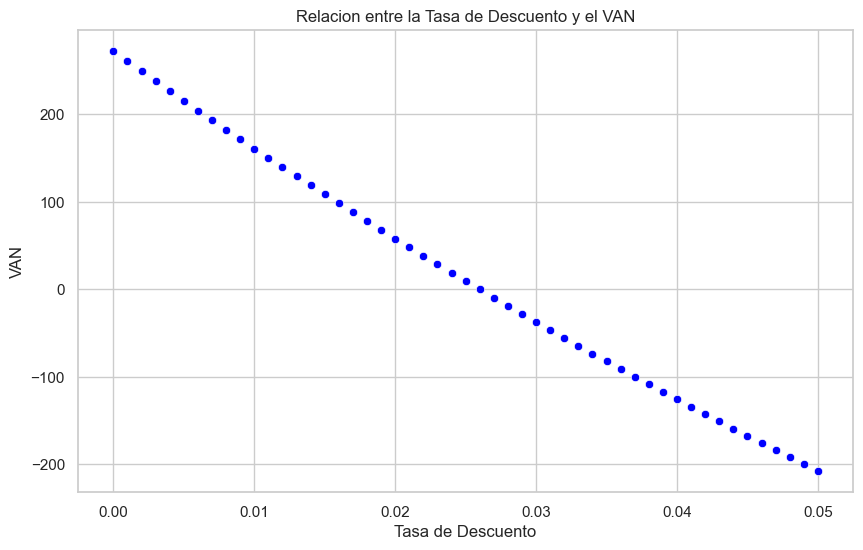

In [22]:
# Configurando grafico 
# El grafico evalua la relacion entre VAN (es la lista "tasas") y  la tasa de descuento (es la lista "VANS")
df= pd.DataFrame({"Van":VANS,
                  "Tasa":TASAS})
pd.set_option('display.float_format', '{:.3f}'.format)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tasa", y="Van",data=df, color = "blue", marker="o")

# Configurando titulos
plt.title("Relacion entre la Tasa de Descuento y el VAN")
plt.xlabel("Tasa de Descuento")
plt.ylabel("VAN")
plt.show


#### Parte 4:

e) La TIR se define como la tasa de descuento que hace que el VAN sea igual a cero. Aproximadamente, ¿cuál sería la TIR del proyecto de ejemplo? (Hint: puede apoyarse en el gráfico de la pregunta (c)).

f) Cree una función que _aproxime_ la TIR, a partir de un vector de "flujos de caja". En esta pregunta hay libertad creativa; puede incluir más argumentos en su función si lo considera necesario. Indique las limitaciones de su función. (Hint: no necesita usar librerías de optimización).

In [23]:
# Observando las tasas y el Van
df_TIR = df[df["Van"] <= 19.04]
df_TIR
# Como se observa en el DataFrame la tasa que mas se aproxima a ser el TIR o aquella tasa que vuelva cero al van es una tasa entre 0.025 y 0.026

,Van,Tasa
24,19.040,0.024
25,9.480,0.025
26,-0.010,0.026
27,-9.420,0.027
28,-18.770,0.028
29,-28.040,0.029
30,-37.250,0.030
31,-46.380,0.031
32,-55.450,0.032
33,-64.450,0.033


In [28]:
#tasa_inicial = 0.025
#tasa_final = 0.026
#incremento = 0.0001

def aproxime_TIR(flujos_caja, tasa_inicial, tasa_final, incremento):
    tasa_actual = tasa_inicial
    while tasa_actual <= tasa_final:
        VAN = sum([flujo/(1+ tasa_actual)**indice for indice, flujo in enumerate(flujos_caja)])
        if abs(VAN)< 0.01:
            return tasa_actual
        tasa_actual += incremento  
    return None
TIR =aproxime_TIR(vector_de_flujos,0.025,0.026,0.0001)
print(TIR)

0.025999999999999995
